## Capstone Mini-Project: Data Wrangling + EDA
This is a continuation of data wrangling notebook. New work starts from line 25.

### Data Collection and Description
Data is obtained from Kaggle: https://www.kaggle.com/mehdidag/black-friday
The dataset is a sample of transactions made in a retail store for one month. It contains customer demographics such as age, gender and marital status, product details including product id and product category, and purchase amount for the whole month.<br>
Dataset from Kaggle is pretty clean and ready to use, not much data wrangling is required.

### Data Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [2]:
# Read data and inspect the first few rows
retail_data = pd.read_csv('BlackFriday.csv')
retail_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
retail_data.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [4]:
# Check if there's any duplicated rows
retail_data.duplicated().sum()

0

In [5]:
# Convert column names to lower case
retail_data.columns = [col.lower() for col in retail_data.columns]

In [6]:
# Examine if all column labels are of type string
all(isinstance(column, str) for column in retail_data.columns)

True

In [7]:
# Check the data types for each column and total count of null entries 
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            370591 non-null float64
product_category_3            164278 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [8]:
# Convert categorical features into 'category' data type
for col in ['gender', 'age', 'occupation', 'city_category', 'stay_in_current_city_years',
            'marital_status', 'product_category_1', 'product_category_2','product_category_3']:
    retail_data[col] = retail_data[col].astype('category')

In [9]:
# See how many categories in each categorial column
for col in ['gender', 'age', 'occupation', 'city_category', 'stay_in_current_city_years',
            'marital_status', 'product_category_1', 'product_category_2', 'product_category_3']:
    print('{}: {}' .format(col, retail_data[col].cat.categories))

gender: Index(['F', 'M'], dtype='object')
age: Index(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], dtype='object')
occupation: Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')
city_category: Index(['A', 'B', 'C'], dtype='object')
stay_in_current_city_years: Index(['0', '1', '2', '3', '4+'], dtype='object')
marital_status: Int64Index([0, 1], dtype='int64')
product_category_1: Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')
product_category_2: Float64Index([ 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0,
              13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
             dtype='float64')
product_category_3: Float64Index([ 3.0,  4.0,  5.0,  6.0,  8.0,  9.0, 10.0, 11.0, 12.0, 13.0, 14.0,
              15.0, 16.0, 17.0, 18.0],
             dtype='float64')


From retail_data.info(), we find that only product_category_2 and product_category_3 have null entries. Use value_counts to futher check if there are other missing values not in the form of 'NaN'. 

In [10]:
for col in retail_data.columns:
    print('Value counts for {} is \n{}'.format(col, retail_data[col].value_counts().head(20)))

Value counts for user_id is 
1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
1003618     766
1001150     752
1001015     739
1002909     717
1001449     714
1002063     708
1004344     705
1003391     697
1003841     697
1000424     694
1004510     690
1001980     684
1005795     680
1001088     679
1004227     676
Name: user_id, dtype: int64
Value counts for product_id is 
P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00145042    1384
P00059442    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
Name: product_id, dtype: int64
Value counts for gender is 
M    405380
F    132197
Name: gender, dtype: int64
Value counts for age is 
26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903


It seems that there are no missing values in other forms. Then investigate a little bit more about the two columns having null entries. Notice that product_category_1 has 18 categories from 1 to 18, product_category_2 has 17 categories from 2 to 18, and product_category_3 has 16 categories from 3 to 18. 

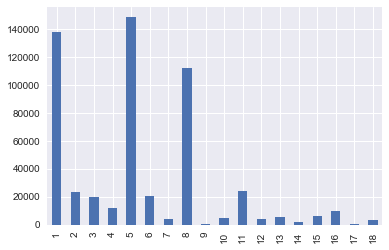

In [11]:
retail_data['product_category_1'].value_counts().sort_index().plot(kind='bar');

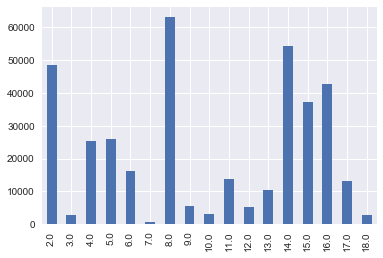

In [12]:
retail_data['product_category_2'].value_counts().sort_index().plot(kind='bar');

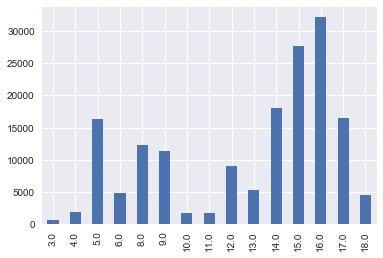

In [13]:
retail_data['product_category_3'].value_counts().sort_index().plot(kind='bar');

In [14]:
retail_data[retail_data['product_category_2'].isnull()].head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,1000005,P00014542,M,26-35,20,A,1,1,8,NaN,NaN,3957


In [15]:
# Find for those nan value products in product_category_2, what categories are they in product_category_1? 
retail_data[retail_data['product_category_2'].isnull()]['product_category_1'].value_counts()

5     62788
8     59828
11    12202
16     9697
1      6498
7      3371
18     3075
15     2797
12     1748
14     1085
6       979
2       910
13      618
17      567
10      447
3       233
4       142
9         1
Name: product_category_1, dtype: int64

In [16]:
retail_data[retail_data['product_category_3'].isnull()]['product_category_2'].value_counts()

14.0    42352
16.0    41732
8.0     36528
15.0    23032
17.0    13130
5.0     10258
11.0     8239
4.0      6012
2.0      5588
13.0     4341
6.0      4272
12.0     4060
18.0     2730
9.0      2657
10.0      767
7.0       615
3.0         0
Name: product_category_2, dtype: int64

In [17]:
retail_data[retail_data['product_category_2'].isnull() & retail_data['product_category_3'].notnull()]

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase


In [18]:
category_12= retail_data[['product_category_1','product_category_2']]
category_12.groupby(['product_category_1','product_category_2']).size()

product_category_1  product_category_2
1                   2.0                   48481
                    3.0                     118
                    4.0                     676
                    5.0                   11127
                    6.0                   10507
                    8.0                   15251
                    11.0                   4761
                    13.0                   1008
                    14.0                   4496
                    15.0                  18281
                    16.0                  14602
                    17.0                   1842
                    18.0                    705
2                   3.0                    2717
                    4.0                    7997
                    5.0                    4099
                    6.0                     185
                    8.0                    2577
                    9.0                    1488
                    12.0                    142
 

In [19]:
category_23 = retail_data[['product_category_2','product_category_3']]
category_23.groupby(['product_category_2','product_category_3']).size()

product_category_2  product_category_3
2.0                 3.0                     600
                    4.0                     513
                    5.0                    7877
                    6.0                    1903
                    8.0                    2765
                    9.0                    4350
                    11.0                   1559
                    13.0                   1333
                    14.0                   3487
                    15.0                  14657
                    16.0                   3443
                    17.0                    194
                    18.0                    212
3.0                 4.0                    1327
                    10.0                    968
                    15.0                    540
4.0                 5.0                    8503
                    8.0                    1593
                    9.0                    3682
                    12.0                   4796
 

For now, we know that all products must be within a category under product_category_1. <br>
Some of them belong to a category under product_category_2 and some not.<br>
There is no product that not belongs to a category in product_category_2 while belongs to a category in product_category_3. <br>
The category under product_category_1 for a product must be lower than its category under the other two categories. for example, if this product is in category 5 for product_category_1, then it's category must be greater than 5 for product_category_2, let's say it's 8, then for product_category_3, it must be greater than 8.

#### Investigate purchase column to see if there's any outliers

In [20]:
retail_data['purchase'].describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: purchase, dtype: float64

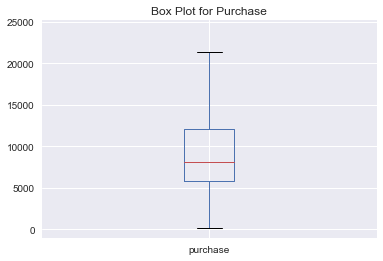

In [21]:
retail_data['purchase'].plot(kind='box')
plt.title('Box Plot for Purchase');

In [22]:
IQR = retail_data['purchase'].describe()[6] - retail_data['purchase'].describe()[4]
threshold = retail_data['purchase'].describe()[6] + (1.5 * IQR)
len(retail_data[retail_data['purchase'] > threshold])

2665

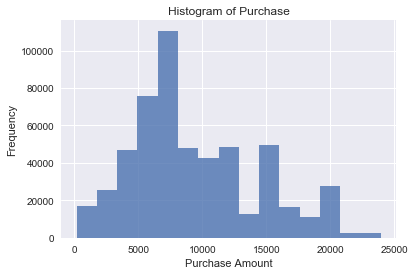

In [23]:
retail_data['purchase'].plot(kind='hist', bins=15, alpha=0.8)
plt.title('Histogram of Purchase')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency');

### EDA

#### How many consumers?

In [24]:
retail_data['user_id'].nunique()

5891

#### How many unique kinds of products were sold?

In [25]:
retail_data['product_id'].nunique()

3623

#### Get a new data frame for each consumers' individual features

In [26]:
user_info = retail_data.groupby('user_id')[['gender', 'age', 'occupation', 'city_category', 
                                         'stay_in_current_city_years', 'marital_status']].first()

In [27]:
user_info.reset_index(inplace=True)

In [28]:
user_info.head()

,user_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0
2,1000003,M,26-35,15,A,3,0
3,1000004,M,46-50,7,B,2,1
4,1000005,M,26-35,20,A,1,1


In [29]:
user_info.shape

(5891, 7)

#### Gender distribution

In [30]:
gender_counts = user_info.gender.value_counts()
gender_counts

M    4225
F    1666
Name: gender, dtype: int64

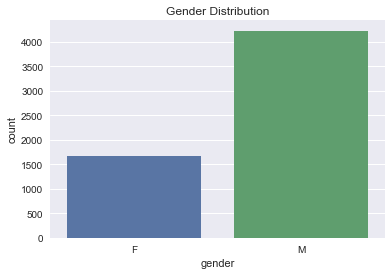

In [31]:
sns.countplot(user_info['gender'])
plt.title('Gender Distribution');

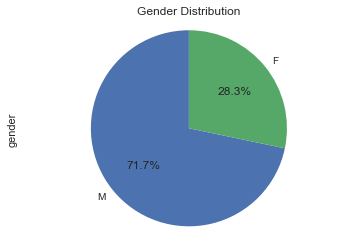

In [32]:
user_info.gender.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal');

#### Total Purchase Amount by Gender

In [33]:
total_purchase_by_gen = retail_data.groupby('gender')['purchase'].sum()
total_purchase_by_gen

gender
F    1164624021
M    3853044357
Name: purchase, dtype: int64

#### Average Purchase Amount for Female and Male Consumers

In [34]:
avg_purchase_by_gen = retail_data.groupby('gender')['purchase'].sum() / user_info.gender.value_counts()
avg_purchase_by_gen

F    699054.034214
M    911963.161420
dtype: float64

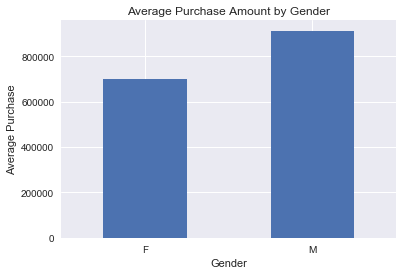

In [35]:
avg_purchase_by_gen.plot(kind='bar')
plt.title('Average Purchase Amount by Gender')
plt.xticks(rotation=360)
plt.xlabel('Gender')
plt.ylabel('Average Purchase');

In [36]:
pur_by_gen = pd.concat([gender_counts, total_purchase_by_gen, avg_purchase_by_gen], axis=1)
pur_by_gen.columns = ['count', 'total_purchase', 'average_purchase']
pur_by_gen

,count,total_purchase,average_purchase
F,1666,1164624021,699054.034214
M,4225,3853044357,911963.161420


#### Age Distribution

In [37]:
user_info.age.value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: age, dtype: int64

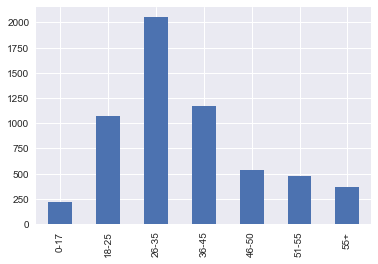

In [38]:
user_info.age.value_counts().sort_index().plot(kind='bar');

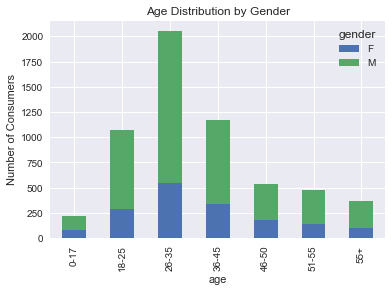

In [39]:
user_info.groupby(['age', 'gender'])['user_id'].count().unstack().plot(kind='bar', stacked=True)
plt.title('Age Distribution by Gender')
plt.ylabel('Number of Consumers');

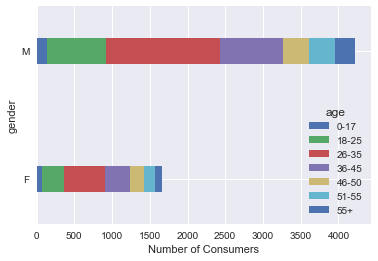

In [40]:
user_info.groupby(['gender', 'age'])['user_id'].count().unstack().plot(kind='barh', width=0.2, stacked=True)
plt.xlabel('Number of Consumers');

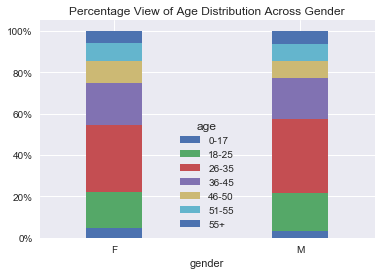

In [41]:
import matplotlib.ticker as mtick
user_info.groupby(['gender', 'age'])['user_id'].size().groupby(level=0).apply(
            lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', width=0.3, stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation='horizontal')
plt.title('Percentage View of Age Distribution Across Gender');

#### What are the most common bought products?

In [42]:
retail_data['product_id'].value_counts().head()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
Name: product_id, dtype: int64

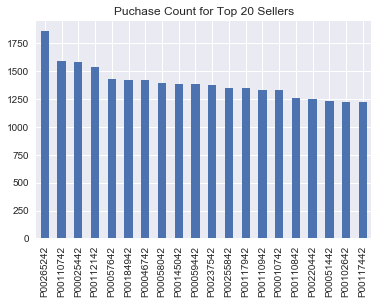

In [43]:
top_20 = retail_data['product_id'].value_counts().head(20)
top_20.plot(kind='bar')
plt.title('Puchase Count for Top 20 Sellers');

In [44]:
# Further check the most sold product
retail_data[retail_data['product_id'] == 'P00265242'].head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
399,1000066,P00265242,M,26-35,18,C,2,0,5,8.0,NaN,8652
1191,1000196,P00265242,F,36-45,9,C,4+,0,5,8.0,NaN,8767
1372,1000222,P00265242,M,26-35,1,A,1,0,5,8.0,NaN,6944
1845,1000301,P00265242,M,18-25,4,B,4+,0,5,8.0,NaN,8628
2209,1000345,P00265242,M,26-35,12,A,2,1,5,8.0,NaN,8593


After examining the best seller P00265242, we find that for the same product, the prices paid are different. Let's plot a histogram for the price of this product.

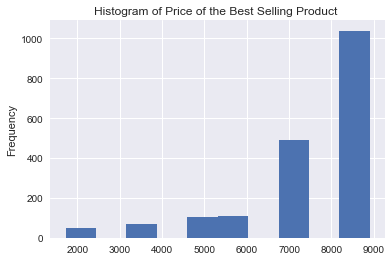

In [45]:
retail_data[retail_data['product_id'] == 'P00265242'].purchase.plot(kind='hist')
plt.title('Histogram of Price of the Best Selling Product ');

In [46]:
retail_data[retail_data['product_id'] == 'P00265242'].purchase.describe()

count    1858.000000
mean     7526.009150
std      1690.048472
min      1720.000000
25%      6945.250000
50%      8603.500000
75%      8760.750000
max      8907.000000
Name: purchase, dtype: float64

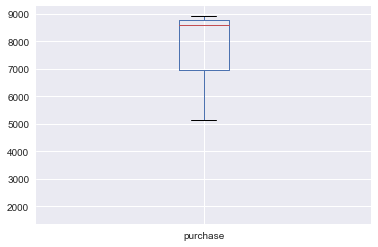

In [47]:
retail_data[retail_data['product_id'] == 'P00265242'].purchase.plot(kind='box');

My guess would be that purchase column is not representing the unit price. We do not know how many units each consumer has bought for this product. How about the second best seller?

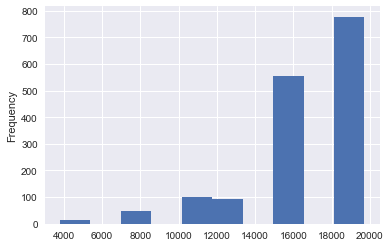

In [48]:
retail_data[retail_data['product_id'] == 'P00110742'].purchase.plot(kind='hist');

In [49]:
retail_data[retail_data['product_id'] == 'P00110742'].purchase.describe()

count     1591.000000
mean     16582.381521
std       3272.185257
min       3798.000000
25%      15321.500000
50%      15901.000000
75%      19298.500000
max      19708.000000
Name: purchase, dtype: float64

#### What are the categories for those most popular products?

In [50]:
most_pop = retail_data['product_id'].value_counts().head()
most_pop_list = list(most_pop.keys())

In [51]:
retail_data[retail_data['product_id'].isin(most_pop_list)][['product_id','product_category_1', 'product_category_2', 
                                                            'product_category_3']].drop_duplicates()

,product_id,product_category_1,product_category_2,product_category_3
235,P00112142,1,2.0,14.0
342,P00110742,1,2.0,8.0
399,P00265242,5,8.0,NaN
667,P00025442,1,2.0,9.0
1004,P00057642,1,15.0,16.0


#### What are the most common bought products for female and male consumers respectively?

In [52]:
retail_data[retail_data['gender'] == 'M'].product_id.value_counts().head()

P00265242    1353
P00025442    1245
P00110742    1234
P00112142    1207
P00057642    1174
Name: product_id, dtype: int64

In [53]:
female_pop = retail_data[retail_data['gender'] == 'F'].product_id.value_counts().head()
female_pop

P00265242    505
P00220442    427
P00058042    378
P00255842    366
P00034742    358
Name: product_id, dtype: int64

The best seller for the overall population 'P00265242' is also the most popular one for both female and male consumers. The next four most popular products are not the same for female and male.

In [54]:
# What categories are the most popular products for female in?
female_pop_list = list(female_pop.keys())
retail_data[retail_data['product_id'].isin(female_pop_list)][['product_id','product_category_1', 'product_category_2', 
                                                            'product_category_3']].drop_duplicates()

,product_id,product_category_1,product_category_2,product_category_3
20,P00220442,5,14.0,NaN
234,P00255842,16,NaN,NaN
399,P00265242,5,8.0,NaN
462,P00034742,5,14.0,17.0
1381,P00058042,8,16.0,NaN


#### Age Distribution for the best seller

In [55]:
best_sell_data = retail_data[retail_data['product_id'] == 'P00265242']
best_sell_data.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
399,1000066,P00265242,M,26-35,18,C,2,0,5,8.0,NaN,8652
1191,1000196,P00265242,F,36-45,9,C,4+,0,5,8.0,NaN,8767
1372,1000222,P00265242,M,26-35,1,A,1,0,5,8.0,NaN,6944
1845,1000301,P00265242,M,18-25,4,B,4+,0,5,8.0,NaN,8628
2209,1000345,P00265242,M,26-35,12,A,2,1,5,8.0,NaN,8593


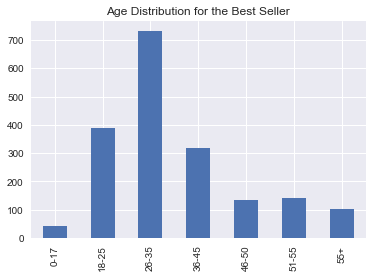

In [56]:
best_sell_data.age.value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution for the Best Seller');

From the bar graph, for this product, many consumers are aged between 26 and 35. How about total purchase amount for each age group?

In [57]:
total_purchase = retail_data.groupby(['user_id']).purchase.sum()

In [58]:
user_total_purchase = user_info.set_index('user_id')
user_total_purchase['total_purchase'] = total_purchase

In [59]:
user_total_purchase.head()

,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,total_purchase
user_id,,,,,,,
1000001,F,0-17,10,A,2,0,333481
1000002,M,55+,16,C,4+,0,810353
1000003,M,26-35,15,A,3,0,341635
1000004,M,46-50,7,B,2,1,205987
1000005,M,26-35,20,A,1,1,821001


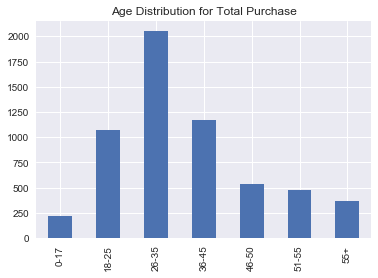

In [60]:
user_total_purchase.age.value_counts().sort_index().plot(kind='bar')
plt.title('Age Distribution for Total Purchase');

Not only for the top one selling product, consumers aged 25-36 also account for the highest proportion of total purchase.

#### Marital Status Distribution Comparison

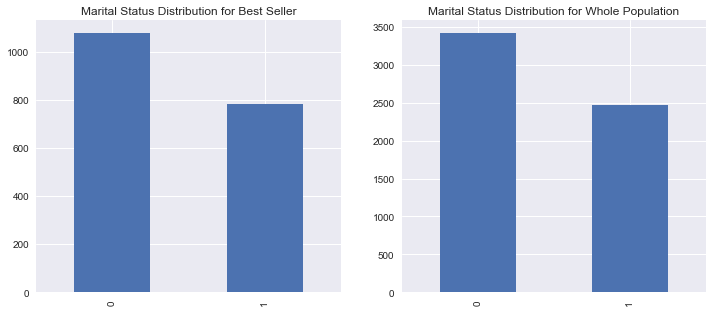

In [61]:
fig, axes = plt.subplots(1, 2)
best_sell_data.marital_status.value_counts().sort_index().plot(kind='bar', ax=axes[0], figsize=(12, 5))
axes[0].set_title('Marital Status Distribution for Best Seller')
user_info.marital_status.value_counts().sort_index().plot(kind='bar', ax=axes[1])
axes[1].set_title('Marital Status Distribution for Whole Population');

#### Occupation Distribution

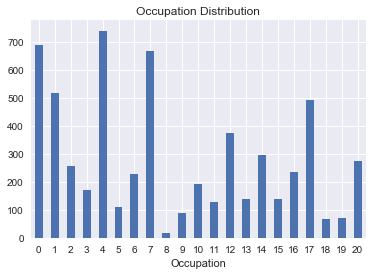

In [62]:
user_info.occupation.value_counts().sort_index().plot(kind='bar')
plt.title('Occupation Distribution')
plt.xticks(rotation=360)
plt.xlabel('Occupation');

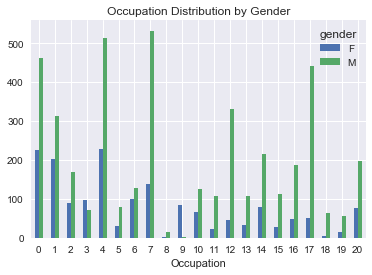

In [63]:
user_info.groupby(['occupation', 'gender'])['user_id'].count().unstack().plot(kind='bar')
plt.title('Occupation Distribution by Gender')
plt.xticks(rotation=360)
plt.xlabel('Occupation');

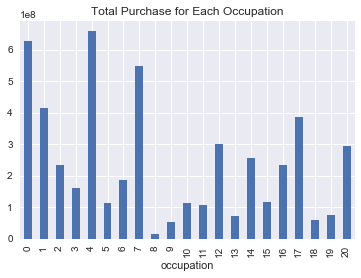

In [64]:
user_total_purchase.groupby('occupation').total_purchase.sum().plot(kind='bar')
plt.title('Total Purchase for Each Occupation');

#### Stay In Current City Years Distribution

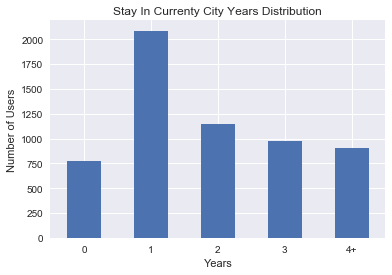

In [65]:
user_info['stay_in_current_city_years'].value_counts().sort_index().plot(kind='bar')
plt.title('Stay In Currenty City Years Distribution')
plt.xticks(rotation=360)
plt.xlabel('Years')
plt.ylabel('Number of Users');

#### City Distribution

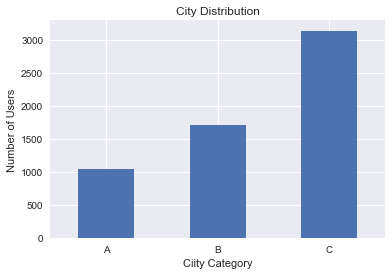

In [66]:
user_info.city_category.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=360)
plt.title('City Distribution')
plt.xlabel('Ciity Category')
plt.ylabel('Number of Users');

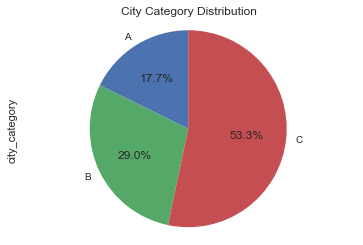

In [67]:
user_info.city_category.value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('City Category Distribution')
plt.axis('equal');

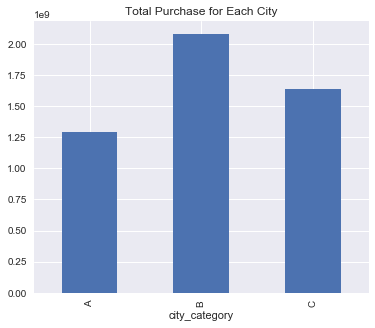

In [68]:
user_total_purchase.groupby('city_category').total_purchase.sum().plot(kind='bar', figsize=(6, 5))
plt.title('Total Purchase for Each City');

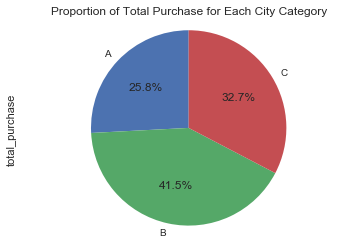

In [69]:
user_total_purchase.groupby('city_category').total_purchase.sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Purchase for Each City Category')
plt.axis('equal');

Although number of consumers in city B are in the middle, their purchasing power is the highest among all three city categories. 

#### Age Distribution for Each City Category

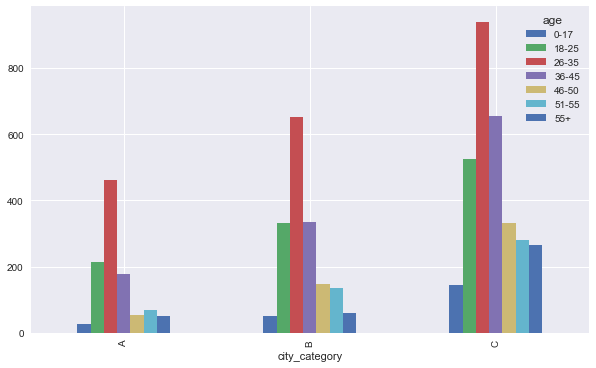

In [70]:
user_info.groupby(['city_category', 'age']).user_id.count().unstack().plot(kind='bar', figsize=(10, 6));

City Category C has a higher proportion of consumers older than 36.